# Проект: Статистический анализ данных сервиса аренды самокатов

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- #### без подписки
     - абонентская плата отсутствует;
     - стоимость одной минуты поездки — 8 рублей;
     - стоимость старта (начала поездки) — 50 рублей;
- #### с подпиской Ultra
     - абонентская плата — 199 рублей в месяц;
     - стоимость одной минуты поездки — 6 рублей;
     - стоимость старта — бесплатно.
     
     
#### Данные:     
users_go:
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

rides_go:
- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки


subscriptions_go:
- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа  

#### Цель исследования: 

Сделать выводы о прибыльности подписки на сервис аренды самокатов.

#### План исследования:
- Провести предварительный анализ данных на полноту данных и аномальные значение
- Описать и визуализировать общую информацию о пользователях и поездках:
     - частота встречаемости городов;
     - соотношение пользователей с подпиской и без подписки;
     - возраст пользователей;
     - расстояние, которое пользователь преодолел за одну поездку;
     - продолжительность поездок.
- Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий
- Вычислить ежемесячный доход по каждому пользователю
- Проверить статистические гипотезы:
    - Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
    - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    - Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
    - Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    - Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

## Загрузим данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
display(users.head())
display(rides.head())
display(subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
display(users.info())
display(rides.info())
display(subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

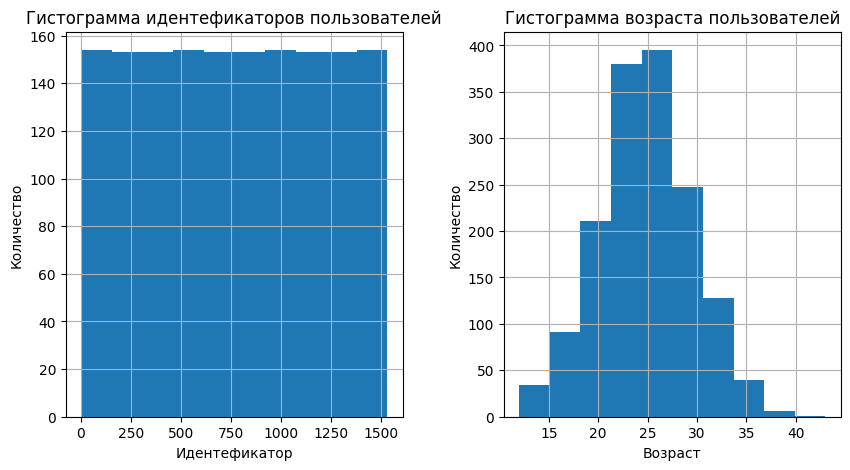

In [46]:
#посмотрим на общий вид каждого столбца с помощью гистограмм
axes = users.hist(figsize = (10,5))
axes[0,0].set_xlabel('Идентефикатор')
axes[0,0].set_ylabel('Количество')
axes[0,0].set_title('Гистограмма идентефикаторов пользователей')

axes[0,1].set_xlabel('Возраст')
axes[0,1].set_ylabel('Количество')
axes[0,1].set_title('Гистограмма возраста пользователей')

plt.show()

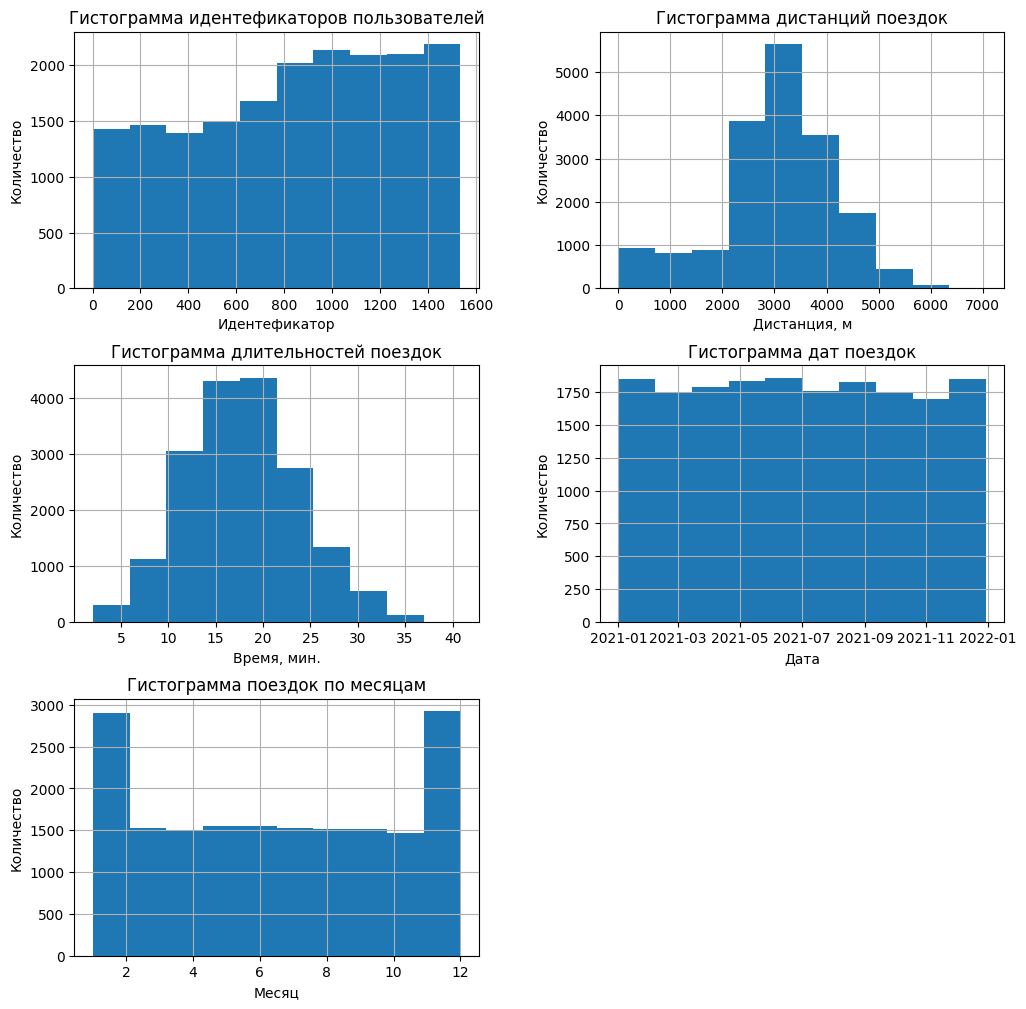

In [53]:
axes = rides.hist(figsize = (12,12))
axes[0,0].set_xlabel('Идентефикатор')
axes[0,0].set_ylabel('Количество')
axes[0,0].set_title('Гистограмма идентефикаторов пользователей')

axes[0,1].set_xlabel('Дистанция, м')
axes[0,1].set_ylabel('Количество')
axes[0,1].set_title('Гистограмма дистанций поездок')

axes[1,0].set_xlabel('Время, мин.')
axes[1,0].set_ylabel('Количество')
axes[1,0].set_title('Гистограмма длительностей поездок')

axes[1,1].set_xlabel('Дата')
axes[1,1].set_ylabel('Количество')
axes[1,1].set_title('Гистограмма дат поездок')

axes[2,0].set_xlabel('Месяц')
axes[2,0].set_ylabel('Количество')
axes[2,0].set_title('Гистограмма поездок по месяцам')

plt.show()

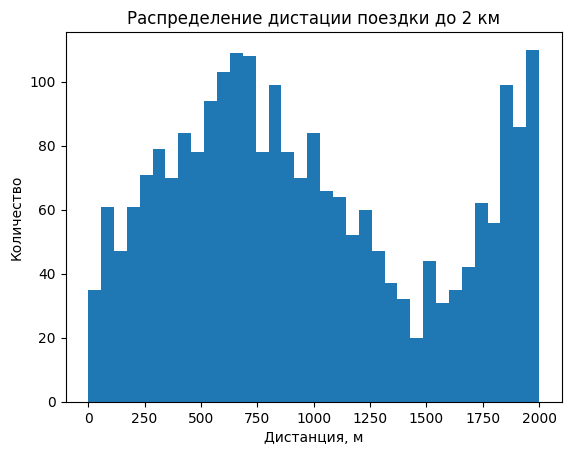

In [6]:
rides['distance'].plot(kind = 'hist',bins = 35, range= (0,2000), 
                       xlabel = 'Дистанция, м', ylabel = 'Количество', 
                       title = 'Распределение дистации поездки до 2 км')
plt.show()

<b> Данные представлены полноценно, масштабных пропусков нет. Столбец дат поездок имеет неправильный тип даных.
В столбце distance df_rides видим какое-то колчество странных поездок с очень низким расстоянием. Позже рассмотрим это детально. 

## Предобработка данных

In [7]:
#изменим тип данных столбца datе и создадим новый столбец с месяцем поездки
rides['date'] = pd.to_datetime(rides['date'])
rides['month'] = rides['date'].dt.month
display(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


None

In [8]:
print('Дата начала сбора данных', rides['date'].min())
print('Дата конца сбора данных', rides['date'].max())


Дата начала сбора данных 2021-01-01 00:00:00
Дата конца сбора данных 2021-12-30 00:00:00


In [9]:
print('users isna()')
display(users.isna().sum())
print('rides isna()')
display(rides.isna().sum())


users isna()


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

rides isna()


user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

<b> В данных нет пропусков

In [10]:
#проверим на дубликаты по user_id
print('users duplicated()')
display(users.duplicated().sum())
print('rides duplicated()')
display(rides.duplicated().sum())
#оставим только первое вхождение
users = users.drop_duplicates(subset=['user_id'], keep='first')
users = users.reset_index(drop=True)

users duplicated()


31

rides duplicated()


0

<b> Обнаружили несколько дубликатов в rides. Их количество не влияет на данные, однако, причину узнать все равно необходимо. Предполагаю, что повторные записи о пользователях появляются, если они воспользовались сервисом спустя большой промежуток времени или восстановили аккаунт. 

##  Исследовательский анализ данных

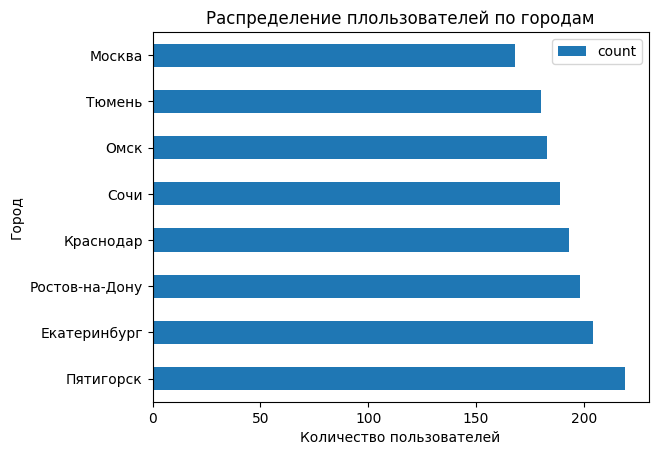

,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Среднее количество пользователей в городе: 191.75


In [11]:
#сделаем сводную таблицу по городам. в качестве индексов возьмем города, а считать будем user_id.
users_pivot = pd.pivot_table(users, index = 'city', values = 'user_id', aggfunc = 'count')
users_pivot.columns = ['count']
users_pivot = users_pivot.sort_values('count', ascending = False)
users_pivot.plot(kind = 'barh', title = 'Распределение плользователей по городам', xlabel = 'Количество пользователей', ylabel = 'Город')
plt.show()
display(users_pivot)
print('Среднее количество пользователей в городе:', users_pivot['count'].mean())


<b> В среднем в каждом городе 191 пользователь. Наибольшее количество пользователей в Пятигорске, а наименьшее в Москве, что немного настораживает. Возможно, сеть начала развиваться именно там. 
    

subscription_type
free     835
ultra    699
Name: count, dtype: int64
Пользователей с подпиской: 45.6 %


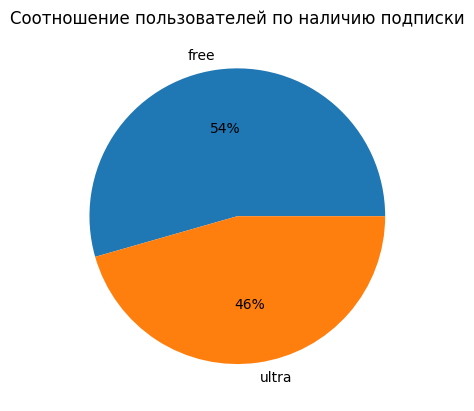

In [12]:
#посмотрим на популярность подписки
print(users.value_counts('subscription_type'))
print('Пользователей с подпиской:', round(100*users.value_counts('subscription_type')['ultra']/users.shape[0], 1), '%')
users.value_counts('subscription_type').plot(kind = 'pie', autopct = '%1.0f%%', ylabel = '', title = 'Соотношение пользователей по наличию подписки')
plt.show()


<b> Почти половина пользователей оформила подписку на сервис. 

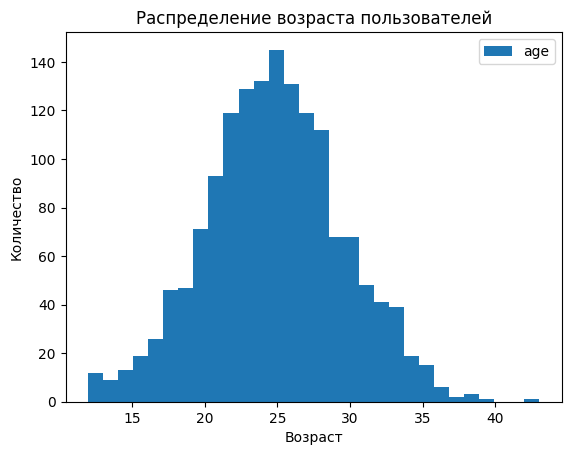

age
25    145
24    132
26    131
23    129
22    119
Name: count, dtype: int64


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [13]:
users.plot(y = 'age', kind = 'hist', bins = 30, 
           title = 'Распределение возраста пользователей', 
           xlabel = 'Возраст', 
           ylabel = 'Количество')
plt.show()
print(users['age'].value_counts().head())
users['age'].describe()

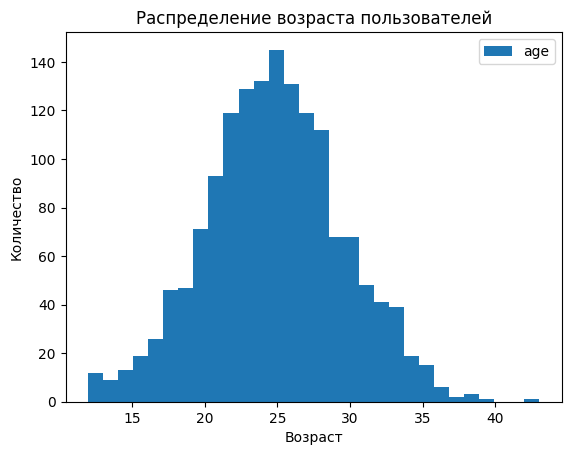

In [14]:
users.plot(y = 'age', kind = 'hist', bins = 30, 
           title = 'Распределение возраста пользователей', 
           xlabel = 'Возраст', 
           ylabel = 'Количество')
plt.show()

<b> 25 лет - самый частый возраст пользователя. 50% пользователей укладывается в промежутке 19-31. Распределение    возраста нормально, аномальных значений нет

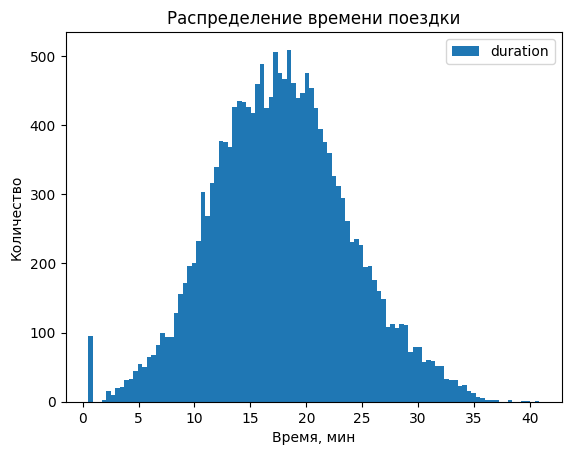

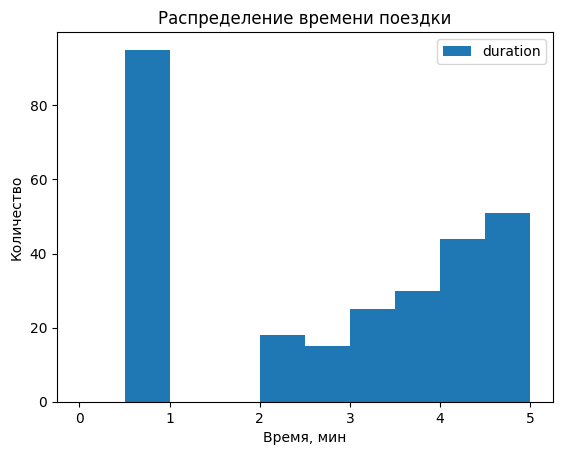

Duration < 2 = 95


In [15]:
rides.plot(y = 'duration', kind = 'hist', bins = 100, title = 'Распределение времени поездки', 
           xlabel = 'Время, мин', 
           ylabel = 'Количество')
rides.plot(y = 'duration', kind = 'hist', bins = 10, title = 'Распределение времени поездки', range = (0,5), xlabel = 'Время, мин', ylabel = 'Количество')
plt.show()
print('Duration < 2 =', rides[rides['duration'] < 2].count()['duration'])


<b>
Снова видим очень короткие поездки. Поездок меньше 2х минут 95. Все остальные значения укладываются в нормальное распределение. Удалим данные значения из данных. 
    
Такие поездки могли возникнуть из-за неисправности самокатов. Пользователи увидели низкий заряд и закончили поездку. 

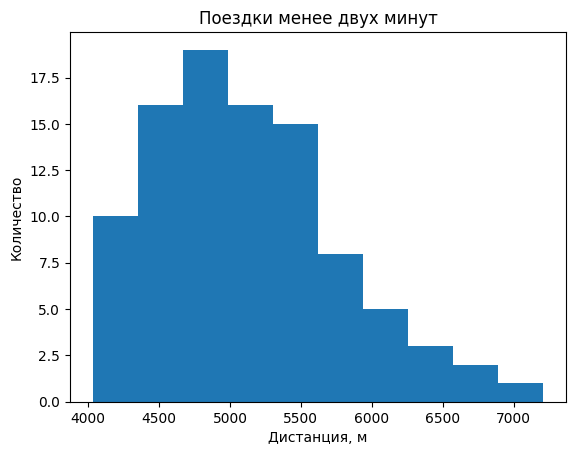

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

In [16]:
rides[rides['duration'] < 2]['distance'].plot(kind = 'hist', title = 'Поездки менее двух минут', 
                                              xlabel = 'Дистанция, м', 
                                              ylabel = 'Количество')
plt.show()
rides[rides['duration'] < 2]['distance'].describe()


<b> Проехать 5 километров за минуты? Явно данные загрузились со сбоем.

In [17]:
rides[rides['duration'] < 2]['duration'].value_counts()

duration
0.5    95
Name: count, dtype: int64

<b> Скорость самокатчиков ~ 600 км/ч. Значения аномальны не только по времени поездки, но и по дистации. Отфильтруем их. 

,user_id,distance,duration,date,month
count,17973.000000,17973.000000,17973.000000,17973,17973.000000
mean,841.551995,3059.863833,17.896480,2021-06-30 19:41:36.745117696,6.486786
min,1.000000,0.855683,2.035632,2021-01-01 00:00:00,1.000000
25%,484.000000,2538.839628,13.670439,2021-04-02 00:00:00,4.000000
50%,887.000000,3129.029255,17.714122,2021-06-30 00:00:00,6.000000
75%,1213.000000,3762.636244,21.747016,2021-09-28 00:00:00,9.000000
max,1534.000000,7066.003772,40.823963,2021-12-30 00:00:00,12.000000
std,435.144929,1108.814612,5.975424,NaN,3.436024


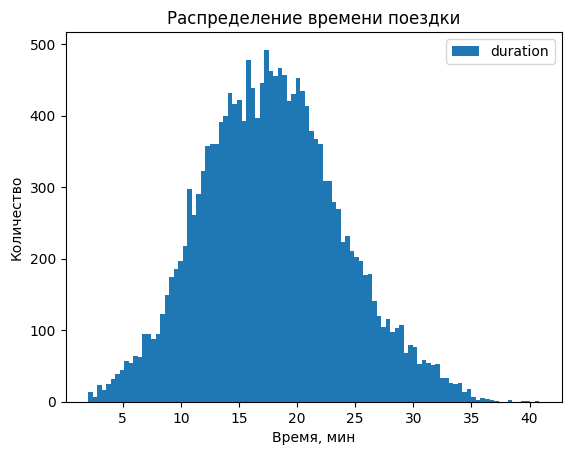

In [55]:
#фильтруем поездки по длительности
rides = rides[rides['duration'] >= 2]
rides.plot(y = 'duration', kind = 'hist', bins = 100, title = 'Распределение времени поездки', 
           xlabel = 'Время, мин', 
           ylabel = 'Количество')
display(rides.describe())
plt.show()

<div class="alert alert-block alert-info">
<b>
Медианная длительность поездки равна 18 минутам. 50% поездок лежит в диапазоне от 10 до 25 минут, что логично. Самокат выбирают как средство передвижения на короткие дистанции. Если взять среднюю скорость самоката за 10км/ч, то среднее расстояние должно быть 3 км. Сейчас проверим данную гипотезу.

Медианная дистанция поездки 3129.03


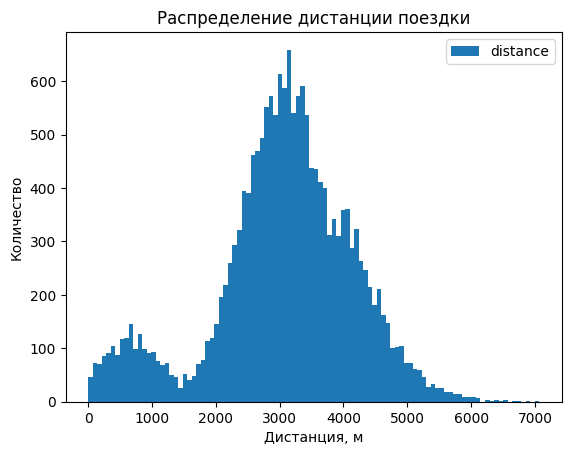

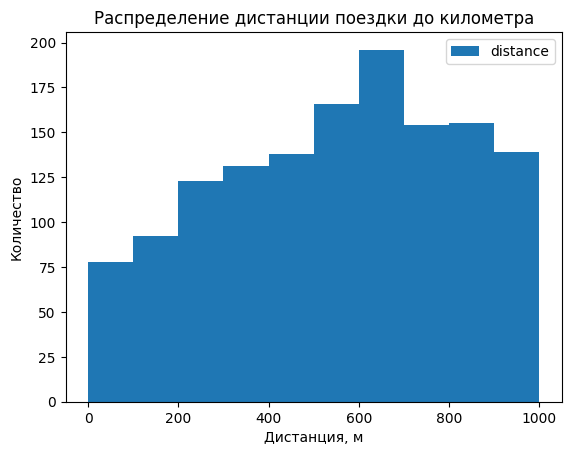

In [19]:
rides.plot(y = 'distance', kind = 'hist', bins = 100, title = 'Распределение дистанции поездки', 
           xlabel = 'Дистанция, м', 
           ylabel = 'Количество')
rides.plot(y = 'distance', kind = 'hist', range = (0,1000), title = 'Распределение дистанции поездки до километра' , 
           xlabel = 'Дистанция, м', 
           ylabel = 'Количество')
print('Медианная дистанция поездки',round(rides['distance'].median(), 2))
plt.show()

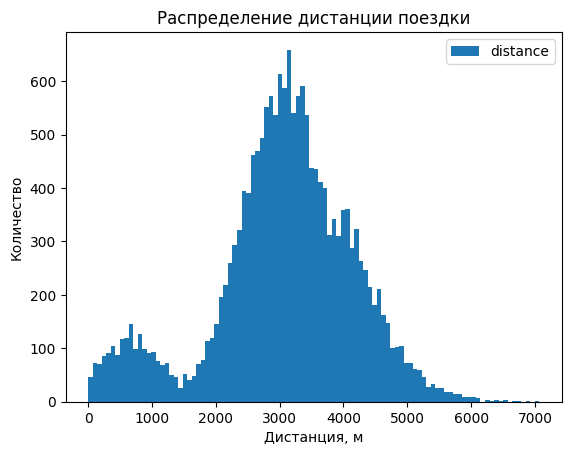

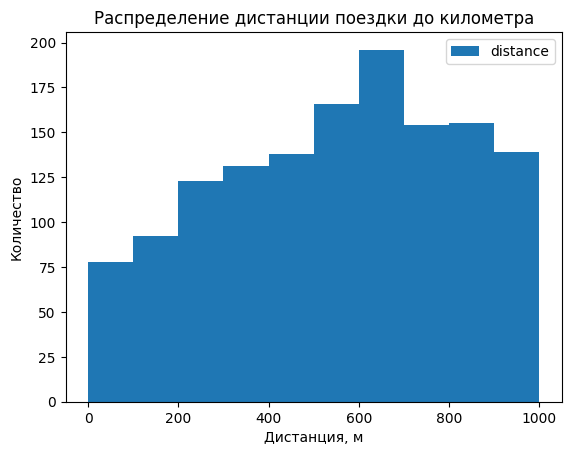

In [20]:
rides.plot(y = 'distance', kind = 'hist', bins = 100, title = 'Распределение дистанции поездки', 
           xlabel = 'Дистанция, м', 
           ylabel = 'Количество')
rides.plot(y = 'distance', kind = 'hist', range = (0,1000), title = 'Распределение дистанции поездки до километра' , 
           xlabel = 'Дистанция, м',
           ylabel = 'Количество')
plt.show()

<b>
Предположение оказалось верным! Однако, на гистограмме видим два пика по дистанции поездки. Разделим по этому признаку поездки на короткие (< 1500м) и длительные (>1500м). В большей степени самокаты используются для длинных поездок.

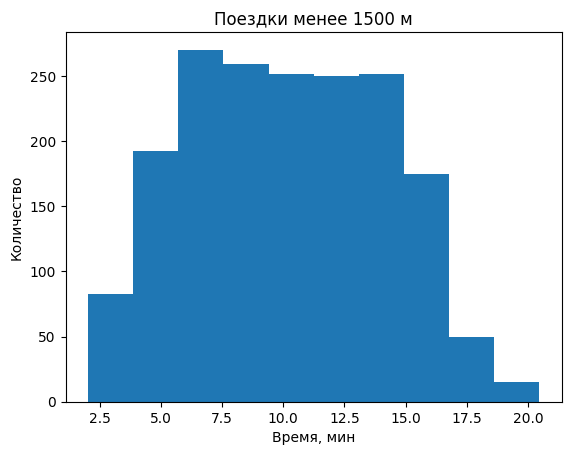

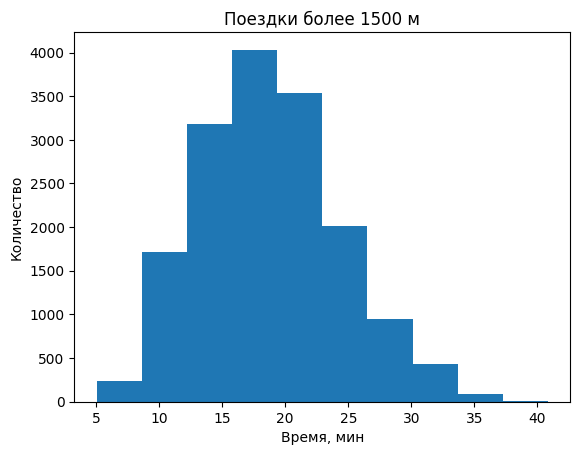

In [21]:
rides[rides['distance'] < 1500]['duration'].plot(kind = 'hist', title = 'Поездки менее 1500 м', 
                                                 xlabel = 'Время, мин', 
                                                 ylabel = 'Количество')
plt.show()

rides[rides['distance'] >= 1500]['duration'].plot(kind = 'hist', title = 'Поездки более 1500 м', 
                                                 xlabel = 'Время, мин', 
                                                 ylabel = 'Количество')
plt.show()




<b>Время поездок до 1,5 км в среднем около 10 минут, однако, есть и слишком короткие поездки. Посмотрим на скорости поездок менее и более 1,5 км.

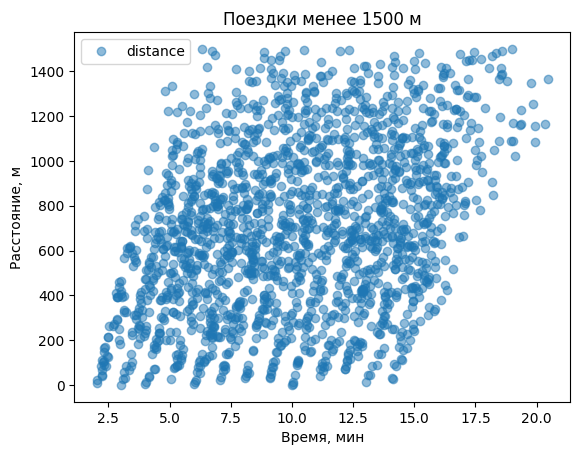

Время поездки менее 1500 м
count    1796.000000
mean       10.170259
std         3.956201
min         2.035632
25%         6.921965
50%        10.094883
75%        13.456112
max        20.457599
Name: duration, dtype: float64


In [22]:
rides[rides['distance'] < 1500].plot(y = 'distance', x = 'duration', title = 'Поездки менее 1500 м', 
                                     xlabel = 'Время, мин', 
                                     ylabel = 'Расстояние, м', style = 'o', alpha=0.5)
plt.show()
print('Время поездки менее 1500 м')
print(rides[rides['distance'] < 1500]['duration'].describe())

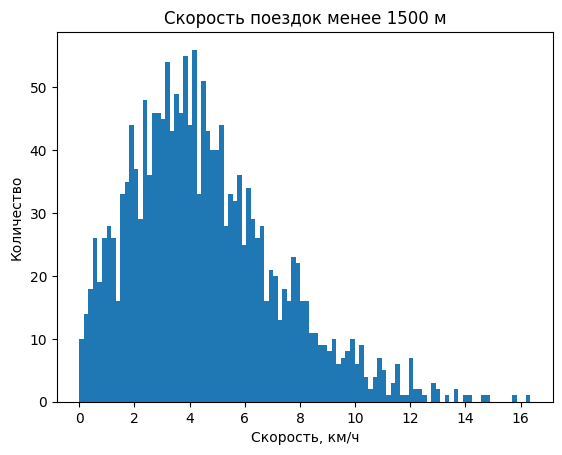

count    1796.000000
mean        4.569765
std         2.681076
min         0.005133
25%         2.635567
50%         4.180627
75%         6.117972
max        16.351400
dtype: float64

In [23]:
velosity_less_1500 = rides[rides['distance'] < 1500]['distance']/rides[rides['distance'] < 1500]['duration']
velosity_less_1500 = velosity_less_1500*60/1000
velosity_less_1500.plot(kind = 'hist', bins = 100, title = 'Скорость поездок менее 1500 м', 
                        xlabel = 'Скорость, км/ч', 
                        ylabel = 'Количество')

plt.show()
velosity_less_1500.describe()


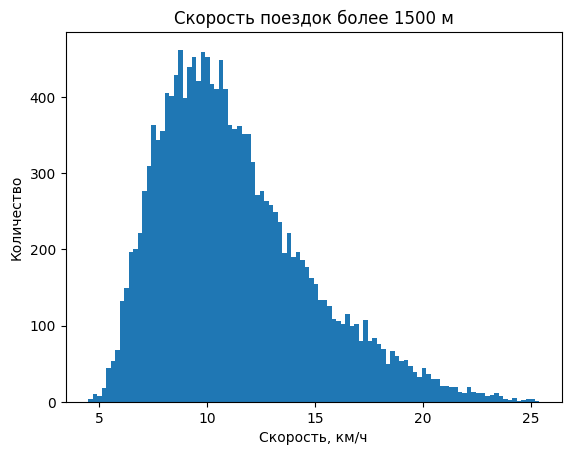

count    16177.000000
mean        11.286060
std          3.487597
min          4.489457
25%          8.696814
50%         10.634956
75%         13.235347
max         25.390275
dtype: float64

In [24]:
velosity_more_1500 = rides[rides['distance'] >= 1500]['distance']/rides[rides['distance'] >= 1500]['duration']
velosity_more_1500 = velosity_more_1500*60/1000
velosity_more_1500.plot(kind = 'hist', bins = 100, title = 'Скорость поездок более 1500 м', 
                        xlabel = 'Скорость, км/ч', 
                        ylabel = 'Количество')

plt.show()
velosity_more_1500.describe()

<b> 
Средние скорости поездок отличаются почти в 3 раза. В поездках до 1,5 км средняя скорость 4 км/ч, а в остальных 11,3 км/ч. Оставляю предположение о возникновении такиих коротких поездок из-за состояния самокатов. На самокатах стоит ограничитель мощности, не позволяющий нагружать разряженный аккумулятор слишком сильно. Из-за этого снижается скорость. Также средняя скорость в 4 км/ч подозрительно похожа на скорость ходьбы. Возможно, эти поездки были совершены во время оживленного движения на тротуарах.    

    
    
    
В поездках до 1,5 км есть как гонщки, проехавшие большое расстояние за короткое время, так и неторопливые люди, проехавшие небольшое расстояние за большое время. 

##  Объединение таблиц


In [25]:
#используем объединение методом outer
data = users.merge(rides, on='user_id', how='outer') 
data = data.merge(subscriptions, on='subscription_type', how='outer') 
#остортируем и обнулим индексы
data = data.sort_values(by = 'user_id')
data = data.reset_index(drop=True)
display(data.head())
#убедимся, что не появились Nan после объединения
data.isna().sum()


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
1,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
2,1,Кира,22,Тюмень,ultra,2720.609748,9.529463,2021-12-22,12,6,0,199
3,1,Кира,22,Тюмень,ultra,4031.020195,17.674448,2021-12-14,12,6,0,199
4,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

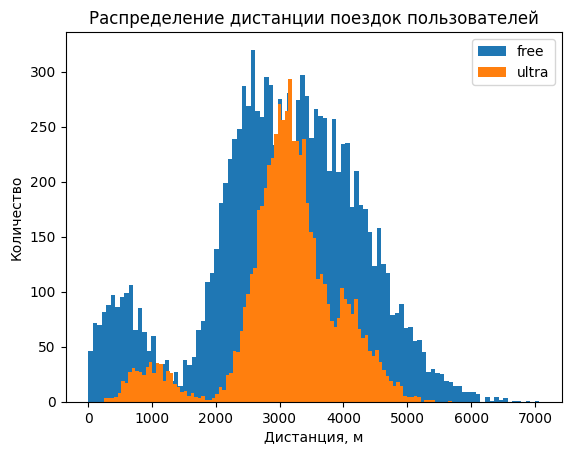

Пользователи без подписки:
count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

Пользователи с подпиской
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


In [26]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_free = data[data['subscription_type'] == 'free']

ax = data_free.plot(y = 'distance', kind = 'hist', bins = 100, 
                    title = 'Распределение дистанции поездок пользователей', 
                    label = 'free')
data_ultra.plot(y = 'distance' , kind = 'hist', bins = 100, ax = ax, 
                label = 'ultra', 
                xlabel = 'Дистанция, м', 
                ylabel = 'Количество')
plt.show()

print('Пользователи без подписки:')
print(data_free['distance'].describe())
print()
print('Пользователи с подпиской')
print(data_ultra['distance'].describe())


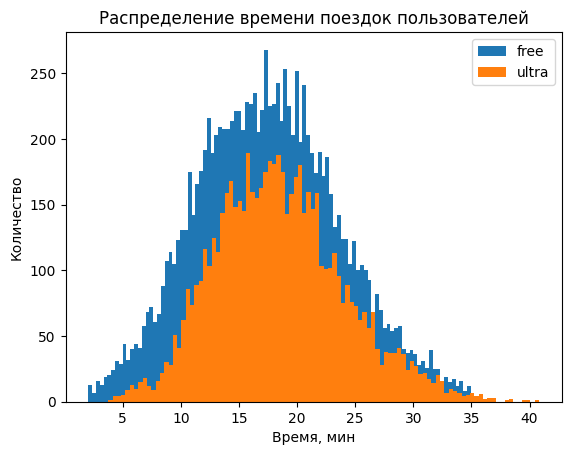

Пользователи без подписки:
count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

Пользователи с подпиской
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


In [27]:
ax = data_free.plot(y = 'duration', kind = 'hist', bins = 100, 
                    title = 'Распределение времени поездок пользователей',
                    label = 'free')
data_ultra.plot(y = 'duration', kind = 'hist', bins = 100 , ax = ax,label = 'ultra', 
                xlabel = 'Время, мин', 
                ylabel = 'Количество')
plt.show()
print('Пользователи без подписки:')
print(data_free['duration'].describe())
print()
print('Пользователи с подпиской')
print(data_ultra['duration'].describe())

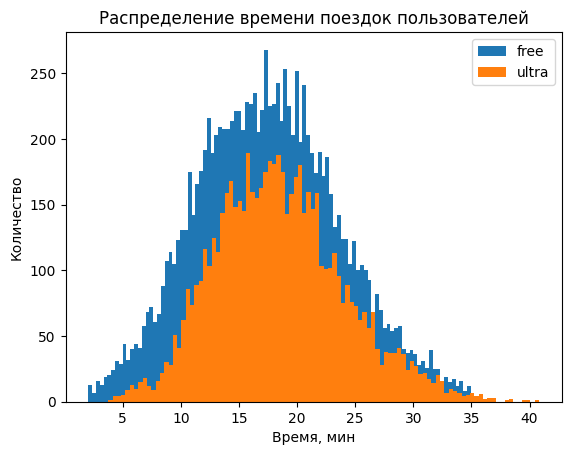

In [28]:
ax = data_free.plot(y = 'duration', kind = 'hist', bins = 100, 
                    title = 'Распределение времени поездок пользователей',
                    label = 'free')
data_ultra.plot(y = 'duration', kind = 'hist', bins = 100 , ax = ax,label = 'ultra', 
                xlabel = 'Время, мин', 
                ylabel = 'Количество')
plt.show()

<b> Видим, что ширина распределений времени и расстояния у пользователей без подписки шире, однако, основные тенденции сохраняются.

## Подсчёт выручки

In [29]:
#создадим сводую таблицу по пользователям и месяцам
data['duration'] = np.ceil(data['duration'])
data_pivot = pd.pivot_table(data,
                            index = ['user_id', 'month'], 
                            values = ['distance','duration'], 
                            aggfunc = {'distance': 'sum', 'duration': ['sum', 'count']})
data_pivot.columns = ['month_distance', 'trips_number', 'month_duration']

#сбросим индексы
data_pivot = data_pivot.reset_index()

#добавим в сводную таблицу начальные данные
data_pivot = data_pivot.merge(data, on = ['user_id', 'month'], how = 'left')

#автоматизируем подсчет месячной прибыли
def profit(row):
    prof = (row['start_ride_price'] * row['trips_number'] +
              row['minute_price'] * row['month_duration'] +
              row['subscription_fee']
              )
    return prof
data_pivot['month_profit'] = data_pivot.apply(profit, axis=1)

,user_id,month,month_distance,trips_number,month_duration,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month_profit
0,1,1,7027.511294,2,42.0,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,6,0,199,451.0
2,1,4,754.159807,1,7.0,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,6,0,199,241.0
3,1,8,6723.470560,2,46.0,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,6,0,199,475.0
5,1,10,5809.911100,2,32.0,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,6,0,199,391.0
7,1,11,7003.499363,3,56.0,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,6,0,199,535.0


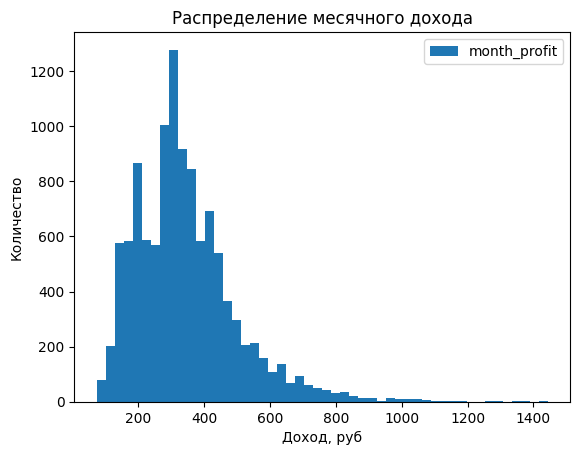

count    11300.000000
mean       342.754956
std        153.317314
min         74.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: month_profit, dtype: float64

In [30]:
#удаляем дубликаты, возникшие после объединения
data_pivot = data_pivot.drop_duplicates(subset = ['user_id', 'month'], keep = 'first')
display(data_pivot.head(5))

data_pivot.plot(y = 'month_profit', kind = 'hist', bins = 50, title = 'Распределение месячного дохода', ylabel = 'Количество', xlabel = 'Доход, руб') 
plt.show()

data_pivot['month_profit'].describe()

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза: Среднее время поездки пользователей с подпиской и без равны. 


Альтернативаня гипотеза: Среднее время поездки пользователей с подпиской больше

In [31]:
from scipy import stats as st
alpha = 0.05
#Для использования t-теста необходимо проверить на нормальность и равенство дисперсий. 
#Нормальность подтверждают графики, а дисперсию посчитаем ниже
print('Дисперсии отличаются на',round((data_free['duration'].var() - data_ultra['duration'].var())/max(data_free['duration'].var(),data_ultra['duration'].var() ),2)*100, '%')

#Будем использовать t-тест с поправкой на разные дисперсии. 
res = st.ttest_ind(data_ultra['duration'],data_free['duration'], equal_var=False, alternative = 'greater')
#Ho - средние значение в выборках равны. H1 - средние различны.

if res.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('p-value = ', res.pvalue)

Дисперсии отличаются на 18.0 %
Отвергаем нулевую гипотезу
p-value =  1.6162210195310587e-29


<b> 
Среднее время поездки пользователей с подпиской достоверно больше чем у пользователей без подписки на уровне значимости 0.05.
    
    

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 


Нулевая гипотеза: Среднее расстояние поездки меньше либо равно 3130 метрам.


Альтернативная: Среднее расстояние поездки более 3130 метров.

In [32]:
#Но - среднее меньше либо равно 3130 метрам. Н1 - среднее более 3130 метров. 
res = st.ttest_1samp(data_ultra['distance'],3130,alternative='greater')
if res.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('p-value = ', res.pvalue)

Не отвергаем нулевую гипотезу
p-value =  0.9195368847849851



<b> Среднее расстояние поездки пользователей с подпиской равно 3130 метров на уровне значимости 0.05. 

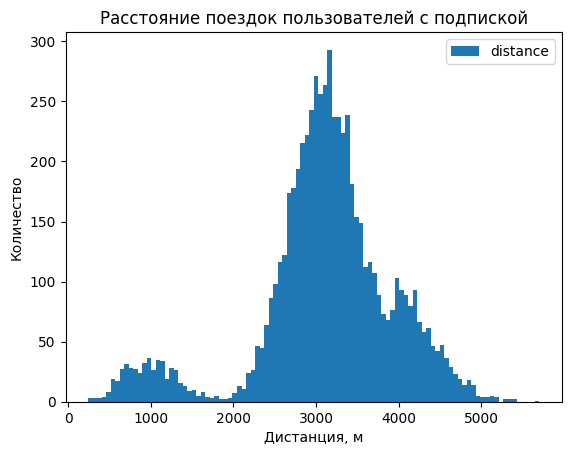

Расстояние поездок пользователей с подпиской с учетом значений до 2 км
 count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64
Расстояние поездок пользователей с подпиской без значений до 2 км
 count    5989.000000
mean     3294.498120
std       585.524844
min      2005.410200
25%      2881.216753
50%      3197.766336
75%      3621.336462
max      5699.769662
Name: distance, dtype: float64


In [33]:
#еще раз посмотрим на расстояние поездок пользователей с подпиской
data_ultra.plot(y = 'distance' , kind = 'hist', bins = 100, title = 'Расстояние поездок пользователей с подпиской', xlabel = 'Дистанция, м', ylabel = 'Количество')
plt.show()
print('Расстояние поездок пользователей с подпиской с учетом значений до 2 км\n', data_ultra['distance'].describe())

print('Расстояние поездок пользователей с подпиской без значений до 2 км\n', data_ultra[data_ultra['distance'] >= 2000]['distance'].describe())


<b> Если учитывать поездки с низкой средней скоростью, то действительно средний пробег не превышает порог. Если отфильтровать данные значения, то средний пробег повысится. Проверим гипотезу с отфильтрованными данными. 

Нулевая гипотеза: Среднее расстояние поездки меньше либо равно 3130 метрам.


Альтернативная: Среднее расстояние поездки более 3130 метров.

In [34]:
res = st.ttest_1samp(data_ultra[data_ultra['distance'] >= 2000]['distance'],3130)
if res.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('p-value = ', res.pvalue)

Отвергаем нулевую гипотезу
p-value =  6.093464448701189e-101



<b> После фильтрации нулевая гипотеза отвергается. Поездки до 2км сильно влияют на результат. Необходима дополнительная информация о возникновении таких поездок. 

###  Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Нулевая гипотеза: Прибыль от пользователей с подпиской равна прибыли от пользователей без подписки


Альтернативная гипотеза: Прибыль от пользователей с подпиской больше. 


In [35]:
#Будем использовать t-тест с поправкой на разные дисперсии. 
res = st.ttest_ind(data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'month_profit'],data_pivot.loc[data_pivot['subscription_type'] == 'free', 'month_profit'], equal_var=False, alternative = 'greater')

if res.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('p-value = ', res.pvalue)

Отвергаем нулевую гипотезу
p-value =  2.497024287285847e-38


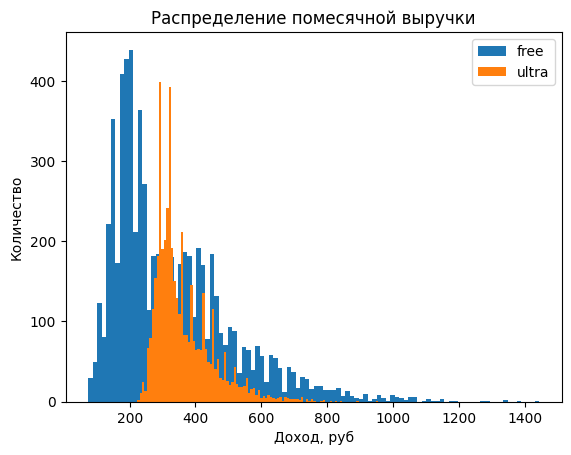

In [36]:
ax = data_pivot.loc[data_pivot['subscription_type'] == 'free'].plot(y = 'month_profit', kind = 'hist', bins = 100, title = 'Распределение помесячной выручки', label = 'free')
data_pivot.loc[data_pivot['subscription_type'] == 'ultra'].plot(y = 'month_profit', kind = 'hist', bins = 100 , ax = ax,label = 'ultra', ylabel = 'Количество', xlabel = 'Доход, руб')
plt.show()

<b> Средняя выручка от пользователей с подпиской достоверно выше.

###  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

<b> Я бы использовал t-тест на равество средних в независимых выборках. Для выбора одностороннего или двухстороннего критерия необходимо визуализировать данные. 
Если среднее действительно не увеличилось, используем односторонний. Также проверю выборки на равенство дисперсий и на нормальность.    
    
    
Если пользователи данного сервиса ограничены к примеру одной компанией, то выборки будут зависимые. Используем scipy.stats.ttest_rel(). Если же сервис является масштабным (по типу стриминга музыки), то выборки можно считать независимыми. Используем scipy.stats.ttest_ind. В любом случае необходимо учитывать ограничения t-теста. 

## Распределения

###  Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [37]:
from matplotlib import pyplot as plt
from math import factorial
alpha = 0.05
p = 0.1 #вероятность 10%
n = 1000 # 1000 * 10% = 100 продленных подписок
distr = []
#Строим биномиальное распределение:
for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k)
    distr.append(prob)

while st.binom.cdf(99, n, p) >= alpha:
    n +=1 
print('Минимальное количество промокодов =', n)

Минимальное количество промокодов = 1161


## Выводы

<b>Предобработка данных:


Качество данных отличное. Пропусков нет, дубликатов было незначительное значение. Было найдено 95 аномальных значений по длительности поездок (менее двух минут). Они были исключены из анализа. Такие поездки могли возникнуть при неисправности самокатов. Это необходимо выяснить.
Также были обнаружены поездки с низкой средней скоростью (4 км/ч) в диапазоне до 1,5 км. Необходима дополнительная информация о данных поездках. 

Анализ данных показал:
- наименьшее количество пользователей находится в Москве, а наибольшее в Пятигорске.
- подпиской пользуется 45% пользователей.
- самый частый возраст пользователя - 25 лет
- медианы времени и дистанции поездки - 18 минут и ~3 км
- средний доход от пользователя в месяц - 340 рублей. 



Были проверены гипотезы времени и расстоянии поездок и средней прибыли пользователей.


Получены результаты:
- Среднее время поездки пользователей с подпиской достоверно больше чем у пользователей без подписки
- Средняя выручка от пользователей с подпиской достоверно выше
- Среднее расстояние поездки пользователей с подпиской равно 3130 метров

    
Пользователи с подпиской делают в среднем более долгие поездки, но не делают поездок длинее 5 км. Пользователи без подписки имеют более широкий диапазон длин поездок (до 6 км). 
    
С точки зрения прибыли и оптимального пробега самоката за сессию, пользователи с подпиской являются более выгодными.
<b>

